In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.svm import SVR

In [3]:
# Outro forma de carregar
df_csv = pd.read_csv('Sales Dataset.csv')

In [4]:
df_csv.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,PaymentMode,Order Date,CustomerName,State,City,Year-Month
0,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2023-06-27,David Padilla,Florida,Miami,2023-06
1,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2024-12-27,Connor Morgan,Illinois,Chicago,2024-12
2,B-26776,9726,1275,5,Electronics,Electronic Games,UPI,2021-07-25,Robert Stone,New York,Buffalo,2021-07


In [5]:
# Carregando a base
data = fetch_california_housing(as_frame=True)
df = data.frame

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


**Análise Exploratória**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
df.shape

(20640, 9)

In [9]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
df.nunique()

MedInc         12928
HouseAge          52
AveRooms       19392
AveBedrms      14233
Population      3888
AveOccup       18841
Latitude         862
Longitude        844
MedHouseVal     3842
dtype: int64

In [43]:
df['HouseAge'].unique()

array([41., 21., 52., 42., 50., 40., 49., 48., 51., 43.,  2., 46., 26.,
       20., 17., 36., 19., 23., 38., 35., 10., 16., 27., 39., 31., 29.,
       22., 37., 28., 34., 32., 47., 44., 30., 18., 45., 33., 24., 15.,
       14., 13., 25.,  5., 12.,  6.,  8.,  9.,  7.,  3.,  4., 11.,  1.])

In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: >

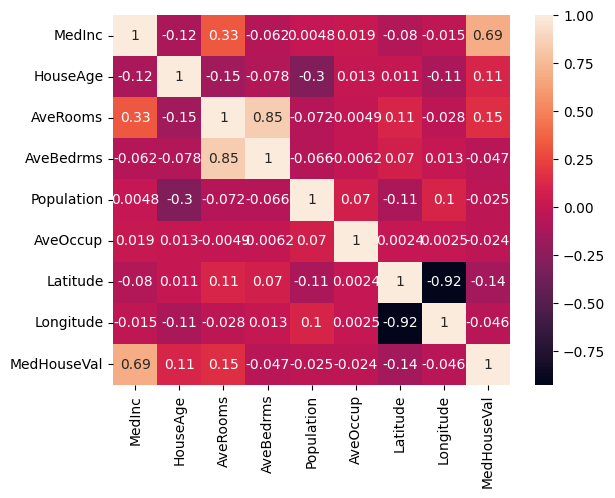

In [17]:
sns.heatmap(df.corr(), annot=True)

<Axes: xlabel='MedHouseVal', ylabel='Count'>

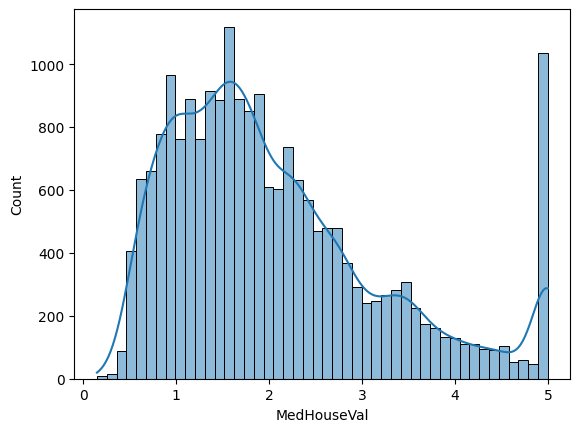

In [18]:
sns.histplot(df['MedHouseVal'], kde=True)

<Axes: >

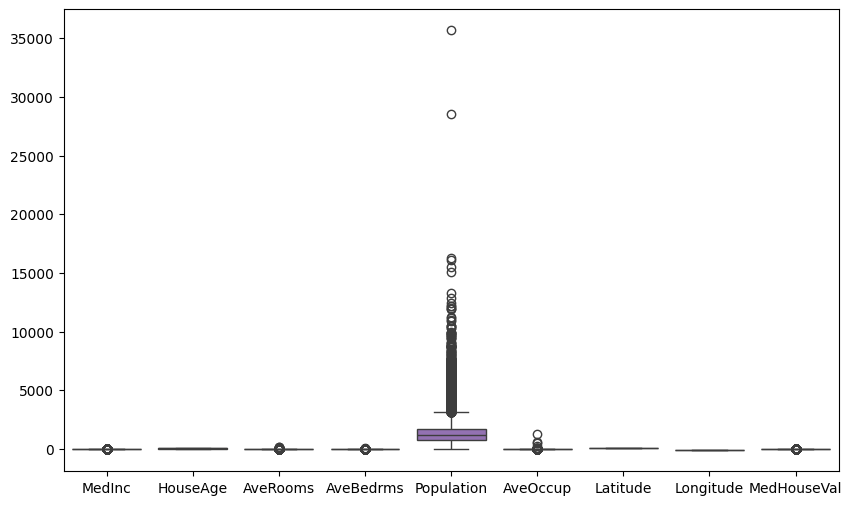

In [35]:
plt.figure(figsize=(10,6))
sns.boxplot(df)

<Axes: ylabel='MedInc'>

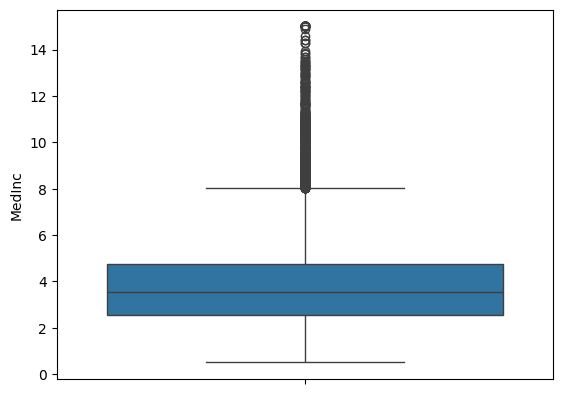

In [19]:
sns.boxplot(df['MedInc'])

In [31]:
# Função para remoer outliers (valores atípicos)
def df_limpar(column, df):
    Q1, Q3 = np.percentile(df[column], [25, 75])
    IRQ = Q3 - Q1
    limite_inferior = Q1 - (1.5 * IRQ)
    limite_superior = Q3 + (1.5 * IRQ)
    df_limpo = df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]

    return df_limpo

In [32]:
df_limpo = df_limpar('MedInc',df)

In [33]:
df_limpo = df_limpar('AveRooms', df)

In [34]:
df_limpo = df_limpar('AveBedrms', df)

In [35]:
df_limpo = df_limpar('Population', df)

In [36]:
df_limpo = df_limpar('AveOccup', df)

In [37]:
df_limpo = df_limpar('MedHouseVal', df)

<Axes: ylabel='MedInc'>

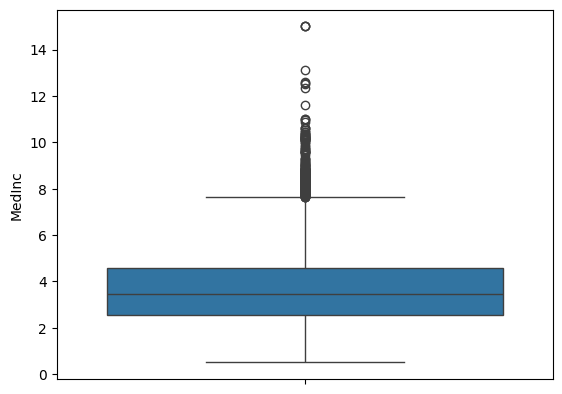

In [38]:
sns.boxplot(df_limpo['MedInc'])

<Axes: >

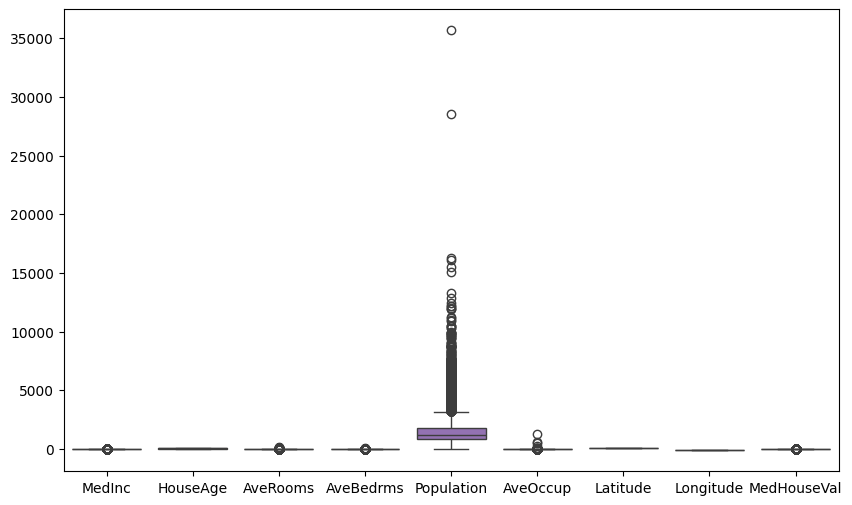

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(df_limpo)

**Este gráfico não mostra uma distribuição normal.** Usar a Normalizaçõ

Uma distribuição normal (ou gaussiana) é caracterizada por ser simétrica, em forma de sino, com a maioria dos dados concentrada em torno da média e diminuindo simetricamente à medida que se afasta da média.

O gráfico abaixo apresenta as seguintes características que o distinguem de uma distribuição normal:

    Assimetria: A distribuição é claramente assimétrica. Há uma cauda mais longa e pronunciada no lado direito (valores mais altos de "MedHouseVal").

<Axes: xlabel='MedHouseVal', ylabel='Count'>

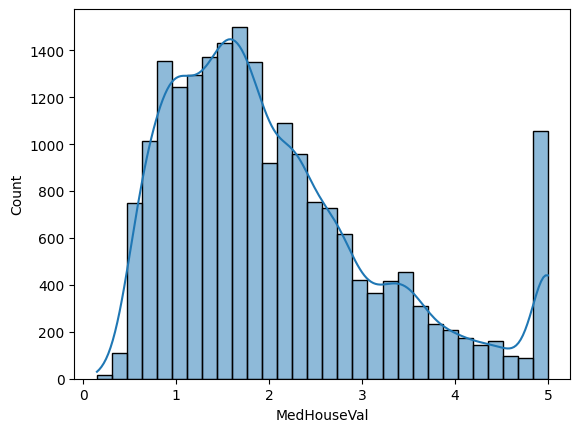

In [44]:
sns.histplot(df['MedHouseVal'], bins=30, kde=True)

**Pré-processamento**

In [42]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [50]:
X = df_limpo.drop('MedHouseVal', axis =1)
y = df_limpo['MedHouseVal']

In [104]:
# o Gráfico não  tem um distribuição Normal
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [22]:
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.30)

**Divisão dos dados**

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

**Treinamento de modelos**

**Regressão Linear**

    Simples: Utiliza uma única variável independente.
    Múltipla: Utiliza várias variáveis independentes.



In [53]:
# Regressão Linear
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
y_pred_lr = lr.predict(X_test)

**Árvores de Decisão**

    Modelos que dividem os dados em subconjuntos baseados em perguntas sobre as variáveis independentes.

    Ele é conhecido por ser propenso a overfitting e instável (pequenas mudanças nos dados podem levar a grandes mudanças na estrutura da árvore). O Bagging (como o Random Forest fez para árvores) ajuda a reduzir a variância e melhorar a robustez de modelos instáveis.

In [55]:
# Árvore de Decisão
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [56]:
y_pred_dt = dt.predict(X_test)

**Florestas Aleatórias**

    Conjunto de várias árvores de decisão que melhora a precisão e reduz o overfitting.

In [57]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [58]:
y_pred_rfr = rfr.predict(X_test)

**K-Nearest Neighbors (KNN)**

    Método que prevê o valor de um ponto com base nos valores dos seus vizinhos mais próximos.


In [59]:
# KNeighbors Regressor
K=7
knn = KNeighborsRegressor(K)
knn.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [60]:
y_pred_knn = knn.predict(X_test)

**SVM (Support Vector Machine)**

In [67]:
# Support Vecto Machine
svr = SVR()
svr.fit(X_train, y_train)

SVR()

In [69]:
y_pred_svr = svr.predict(X_test)

**Avaliação de Desempenho dos Modelos de Regressão**

    Erro Quadrático Médio (MSE)
    Raiz do Erro Quadrático Médio (RMSE)
    Erro Absoluto Médio (MAE)
    R² (Coeficiente de Determinação)

In [70]:
# Regressão Linear
MSE = mean_squared_error(y_test, y_pred_lr)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test, y_pred_lr)
R2 = r2_score(y_test, y_pred_lr)

# Decision Tree
MSE_dt = mean_squared_error(y_test, y_pred_dt)
RMSE_dt = np.sqrt(MSE)
MAE_dt = mean_absolute_error(y_test, y_pred_dt)
R2_dt = r2_score(y_test, y_pred_dt)

# RandomForest
MSE_rfr = mean_squared_error(y_test, y_pred_rfr)
RMSE_rfr = np.sqrt(MSE)
MAE_rfr = mean_absolute_error(y_test, y_pred_rfr)
R2_rfr = r2_score(y_test, y_pred_rfr)

# KNeighbors
MSE_knn = mean_squared_error(y_test, y_pred_knn)
RMSE_knn = np.sqrt(MSE)
MAE_knn = mean_absolute_error(y_test, y_pred_knn)
R2_knn = r2_score(y_test, y_pred_knn)

# SVR
MSE_svr = mean_squared_error(y_test, y_pred_svr)
RMSE_svr = np.sqrt(MSE)
MAE_svr = mean_absolute_error(y_test, y_pred_svr)
R2_svr = r2_score(y_test, y_pred_svr)

In [124]:
print("Regressão Linear")
print(f'MSE: {MSE: .4f}') 
print(f'RMSE: {RMSE: .5f}') 
print(f'MAE:  {MAE: .4f}')
print(f'R2: {R2: .4f}')
print("Decision Tree")
print(f'MSE: {MSE_dt: .4f}') 
print(f'RMSE: {RMSE_dt: .5f}') 
print(f'MAE:  {MAE_dt: .4f}')
print(f'R2: {R2_dt: .4f}')
print("Random Forest")
print(f'MSE: {MSE_rfr: .4f}') 
print(f'RMSE: {RMSE_rfr: .5f}') 
print(f'MAE:  {MAE_rfr: .4f}')
print(f'R2: {R2_rfr: .4f}')
print("KNeighbors")
print(f'MSE: {MSE_knn: .4f}') 
print(f'RMSE: {RMSE_knn: .5f}') 
print(f'MAE:  {MAE_knn: .4f}')
print(f'R2: {R2_knn: .4f}')
print("SVR")
print(f'MSE: {MSE_svr: .4f}') 
print(f'RMSE: {RMSE_svr: .5f}') 
print(f'MAE:  {MAE_svr: .4f}')
print(f'R2: {R2_svr: .4f}')

Regressão Linear
MSE:  0.3697
RMSE:  0.60806
MAE:   0.4603
R2:  0.5953
Decision Tree
MSE:  0.4155
RMSE:  0.60806
MAE:   0.4261
R2:  0.5453
Random Forest
MSE:  0.1997
RMSE:  0.60806
MAE:   0.3048
R2:  0.7814
KNeighbors
MSE:  0.2911
RMSE:  0.60806
MAE:   0.3812
R2:  0.6814
SVR
MSE:  0.3291
RMSE:  0.60806
MAE:   0.4069
R2:  0.6398


O MSE mede a média dos erros ao quadrado. Um valor menor indica que o modelo tem um desempenho melhor. 
A Floresta Aleatória apresenta o menor MSE, sugerindo que é o modelo mais preciso entre os testados.

O RMSE é a raiz quadrada do MSE e fornece uma medida de erro em unidades da variável dependente. O fato de todos os modelos apresentarem o mesmo RMSE pode indicar que a variabilidade dos erros é semelhante

O MAE mede a média dos erros absolutos. Assim como o MSE, um valor menor indica um melhor desempenho. A Floresta Aleatória novamente apresenta o menor MAE, indicando que, em média, suas previsões estão mais próximas dos valores reais.

O R² mede a proporção da variabilidade na variável dependente que é explicada pelo modelo. Um valor de R² mais próximo de 1 indica que o modelo explica bem a variabilidade dos dados. A Floresta Aleatória tem o maior R², sugerindo que é o modelo que melhor se ajusta aos dados.

**Validação Cruzada (5-Fold)**

Os resultados são baseados em validação cruzada, o que fornece uma estimativa mais robusta da capacidade de generalização dos modelos em comparação com uma única divisão de treino/teste.

In [80]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
score_lr = cross_val_score(LinearRegression(), X_train, y_train, cv=kf)
score_lr

array([0.57827815, 0.57044207, 0.52380353, 0.56415364, 0.55710421])

In [89]:
score_dt = cross_val_score(DecisionTreeRegressor(), X_train, y_train, cv=kf)
score_dt

array([0.52051262, 0.50280782, 0.49407199, 0.5773818 , 0.47927022])

In [95]:
score_rfr = cross_val_score(RandomForestRegressor(), X_train, y_train, cv=kf)
score_rfr

array([0.76153955, 0.77937671, 0.73723138, 0.77758652, 0.76718917])

In [97]:
score_knn = cross_val_score(KNeighborsRegressor(), X_train, y_train, cv=kf)
score_knn

array([0.67088689, 0.66538166, 0.633204  , 0.65079303, 0.64809779])

In [99]:
score_svr = cross_val_score(SVR(), X_train, y_train, cv=kf)
score_svr

array([0.62297536, 0.62308616, 0.60079812, 0.61470753, 0.61037227])

In [101]:
print('Avg_lr R2:', np.average(score_lr))
print('Avg_dt R2:', np.average(score_dt))
print('Avg_rfr R2:', np.average(score_rfr))
print('Avg_knn R2:', np.average(score_knn))
print('Avg_svr R2:', np.average(score_svr))

Avg_lr R2: 0.558756321503487
Avg_dt R2: 0.514808888057001
Avg_rfr R2: 0.7645846643316538
Avg_knn R2: 0.6536726743185175
Avg_svr R2: 0.6143878887497237


Este é o modelo com o melhor desempenho atual. O Random Forest já é um algoritmo de bagging intrinsecamente (usa múltiplos Decision Trees e agrega os resultados). Portanto, aplicar bagging separadamente a ele não faz sentido, pois ele já o faz por padrão.

**Métodos de Cojunto**

**Bagging(Boostrap Aggregating) - para modelos fracos e instáveis**

 O bagging é uma técnica que combina múltiplos modelos treinados em subconjuntos aleatórios dos dados. O Random Forest é uma implementação popular do bagging, onde várias árvores de decisão são criadas a partir de amostras de bootstrap.

 Decision tre: Ele é conhecido por ser propenso a overfitting e instável (pequenas mudanças nos dados podem levar a grandes mudanças na estrutura da árvore). O Bagging (como o Random Forest fez para árvores) ajuda a reduzir a variância e melhorar a robustez de modelos instáveis.

In [105]:
from sklearn.ensemble import BaggingRegressor

In [108]:
d_tree = DecisionTreeRegressor(max_depth=4, random_state=42)

In [109]:
bagging = BaggingRegressor(estimator=d_tree)
bagging.fit(X_train, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=4, random_state=42))

In [110]:
y_pred_bagging = bagging.predict(X_test)

In [111]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_bagging)))

RMSE: 0.6292218737151414


**Boosting (para modelos fracos e com alto viés):**

 O boosting treina modelos sequencialmente, onde cada modelo tenta corrigir os erros do anterior. Isso é frequentemente feito com árvores de decisão fracas (ou seja, árvores com profundidade limitada).

 Decision Tree e Regressão Linear: Ambos são bons candidatos para boosting, especialmente se você acredita que eles têm alto viés (ou seja, não estão capturando bem a relação nos dados).

In [112]:
from sklearn.ensemble import AdaBoostRegressor

In [113]:
boosting = AdaBoostRegressor(estimator=d_tree)
boosting.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4, random_state=42))

In [114]:
y_pred_boosting = boosting.predict(X_test)

In [115]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_boosting)))

RMSE: 0.7062970376836348


**Stacking (para combinar o melhor de vários modelos)**

Todos os modelos (ou os melhores dentre eles): O Stacking é uma técnica poderosa para combinar as previsões de vários modelos diferentes (heterogêneos) para obter um desempenho ainda melhor. Se pode usar os modelos que você já treinou (Regressão Linear, Decision Tree, KNN, SVR).

Quando usar Stacking: É particularmente útil quando seus modelos individuais mostram diferentes tipos de erros ou capturam diferentes aspectos dos dados. O Random Forest já está com um bom desempenho, mas o stacking pode potencialmente elevá-lo ainda mais, ao incorporar as forças dos outros modelos.

In [116]:
from sklearn.ensemble import StackingRegressor

In [120]:
# 1. Instanciar os modelos base
estimators = [
    ('lr', LinearRegression()),
    ('dt', DecisionTreeRegressor(random_state=42)),
    ('knn', KNeighborsRegressor(n_neighbors=7)), # Certifique-se de usar K=7 aqui
    ('svr', SVR())
]

final_estimator = LinearRegression()

In [121]:
stacking = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=kf, n_jobs=-1, passthrough=False)
stacking.fit(X_train, y_train)

StackingRegressor(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                  estimators=[('lr', LinearRegression()),
                              ('dt', DecisionTreeRegressor(random_state=42)),
                              ('knn', KNeighborsRegressor(n_neighbors=7)),
                              ('svr', SVR())],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [122]:
y_pred_stacking = stacking.predict(X_test)

In [123]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_stacking)))

RMSE: 0.49408881795010623
